# TSP PROBLEM

## Iterating through all cases in a loop

In [1]:
import itertools
import time

points = ['start', 'snacks', 'store', 'movie', 'food']
dist = [
    [0.0, 156.3, 171.9, 183.2, 335.3],
    [146.6, 0.0, 120.7, 108.6, 189.3],
    [161.1, 124.4, 0.0, 219.0, 136.0],
    [181.9, 139.2, 248.2, 0.0, 119.7],
    [322.6, 136.3, 120.2, 118.5, 0.0]
]

shortest_path = None
shortest_distance = float('inf')

start_time = time.perf_counter()

for path in itertools.permutations(points[1:]):
    distance = 0
    for i in range(len(path) - 1):
        start = points.index(path[i])
        end = points.index(path[i + 1])
        distance += dist[end][start]
    # Add the distance from start to the first point
    start1 = points.index('start')
    end1 = points.index(path[0])
    # Add the distance from the last point back to the starting point
    start2 = points.index(path[-1])
    end2 = points.index('start')
    distance += dist[end1][start1] + dist[end2][start2]
    print(path, 'distance = ', round(distance, 1))
    if distance < shortest_distance:
        shortest_distance = distance
        shortest_path = path

end_time = time.perf_counter()
total_time = end_time - start_time

print("Shortest path: start, {}, {}, {}, {}".format(*shortest_path))
print('Shortest distance:', shortest_distance)
print(f"The program execution time is：{total_time}s")

('snacks', 'store', 'movie', 'food') distance =  973.0
('snacks', 'store', 'food', 'movie') distance =  694.1
('snacks', 'movie', 'store', 'food') distance =  960.3
('snacks', 'movie', 'food', 'store') distance =  712.2
('snacks', 'food', 'store', 'movie') distance =  850.3
('snacks', 'food', 'movie', 'store') distance =  793.5
('store', 'snacks', 'movie', 'food') distance =  874.8
('store', 'snacks', 'food', 'movie') distance =  721.0
('store', 'movie', 'snacks', 'food') distance =  989.5
('store', 'movie', 'food', 'snacks') distance =  873.4
('store', 'food', 'snacks', 'movie') distance =  793.0
('store', 'food', 'movie', 'snacks') distance =  665.9
('movie', 'snacks', 'store', 'food') distance =  870.4
('movie', 'snacks', 'food', 'store') distance =  734.7
('movie', 'store', 'snacks', 'food') distance =  993.2
('movie', 'store', 'food', 'snacks') distance =  866.7
('movie', 'food', 'snacks', 'store') distance =  786.0
('movie', 'food', 'store', 'snacks') distance =  713.4
('food', '

## Dynamic programming solutions

In [2]:
import sys
import time


def tsp_dp(dist):
    n = len(dist)
    all_visited = (1 << n) - 1  

    dp = [[sys.maxsize] * (1 << n) for _ in range(n)]

    # Initialize the dp array to access only its own distance from starting point i to 0
    for i in range(n):
        dp[i][1 << i] = dist[i][0]

    # Dynamic Planning
    for visited in range(1, all_visited + 1):
        for i in range(n):
            if visited & (1 << i) == 0:
                continue
            for j in range(n):
                if i == j or visited & (1 << j) == 0:
                    continue
                dp[i][visited] = min(dp[i][visited], dp[j][visited ^ (1 << i)] + dist[j][i])

    # In the end it must be the state with the shortest distance back to the starting point
    return min(dp[i][all_visited] + dist[i][0] for i in range(n))


dist = [[0.0, 146.6, 161.1, 181.9, 322.6],
        [156.3, 0.0, 124.4, 139.2, 136.3],
        [171.9, 120.7, 0.0, 248.2, 120.2],
        [183.2, 108.6, 219.0, 0.0, 118.5],
        [335.3, 189.3, 136.0, 119.7, 0.0]]

start_time = time.perf_counter()

minDistance=tsp_dp(dist)

end_time = time.perf_counter()
total_time = end_time - start_time

print('Shortest distance:', round(shortest_distance, 1))
print(f"The program execution time is：{total_time}s")

Shortest distance: 665.9
The program execution time is：0.0002071000000114509s


## Show the final shortest route on the map

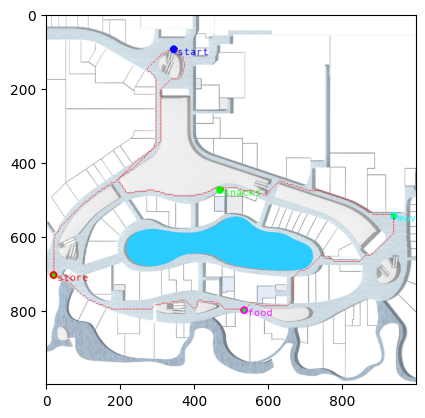

In [3]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt


def calMinL(starLocation, endLocation):
    # Reads a grayscale image of the map, with a grayscale of 0 indicating an obstacle
    readMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\blackCircle.png",
                         cv2.IMREAD_GRAYSCALE)
    # Images for drawing paths
    mapSize = np.array(readMap)
    hight = mapSize.shape[0]
    width = mapSize.shape[1]

    startX, startY = starLocation[0], starLocation[1]
    endX, endY = endLocation[0], endLocation[1]
    startPrice = max(abs(startX - endX), abs(startY - endY))
    endPrice = abs(startX - endX) + abs(startY - endY)
    start = {'pos': (startX, startY), 'price': startPrice, 'fNode': (startX, startY)}
    end = {'pos': (endX, endY), 'price': endPrice, 'fNode': (endX, endY)}

    openList = []
    closeList = [start]

    step_size = 4

    while True:
        lastPoint = closeList[-1]['pos']
        add = ([0, step_size], [0, -step_size], [step_size, 0], [-step_size, 0], [step_size, step_size],
               [step_size, -step_size], [-step_size, step_size], [-step_size, -step_size])
        for i in range(len(add)):
            x = lastPoint[0] + add[i][0]
            if x < 0 or x >= width:
                continue
            y = lastPoint[1] + add[i][1]
            if y < 0 or y >= hight:
                continue
            dx1 = abs(x - start['pos'][0])
            dy1 = abs(y - start['pos'][1])
            dx2 = abs(x - end['pos'][0])
            dy2 = abs(y - end['pos'][1])
            G = dx1 + dy1  # G-price
            H = 1.5* (dx2 + dy2)
            F = G + H
            if H < 20:
                step_size = 1
            addpoint = {'pos': (x, y), 'price': F, 'fNode': lastPoint}  # New-position
            count = 0
            # If the point is in one of the two lists, mark it
            for j in openList:
                if j['pos'] == addpoint['pos']:
                    count = 1
            for k in closeList:
                if k['pos'] == addpoint['pos']:
                    count = 1
            if count == 0:
                if readMap[y, x] != 0:  # The point is a non-obstacle
                    openList.append(addpoint)

        tempPoint = {'pos': (startX, startY), 'price': 10000, 'fNode': (startX, startY)}
        # Finding the least costly point
        for j in range(len(openList)):
            if openList[j]['price'] < tempPoint['price']:
                tempPoint = openList[j]
        for j in range(len(openList)):
            if tempPoint == openList[j]:
                openList.pop(j)
                break
        closeList.append(tempPoint)
        if tempPoint['pos'] == end['pos']:
            break

    # Reverse search to find the path
    road = []
    road.append(closeList[-1])
    point = road[-1]
    distance = 0

    while True:
        for i in closeList:
            if i['pos'] == point['fNode']:
                distance += math.sqrt((point['pos'][0] - i['pos'][0]) ** 2 + (point['pos'][1] - i['pos'][1]) ** 2)
                point = i  # point = road[-1]
                road.append(point)
        if point == start:
            break

    return road


def draw(writeMap, road, starLocation, endLocation):
    startX, startY = starLocation[0], starLocation[1]
    endX, endY = endLocation[0], endLocation[1]
    startPrice = max(abs(startX - endX), abs(startY - endY))
    endPrice = abs(startX - endX) + abs(startY - endY)
    start = {'pos': (startX, startY), 'price': startPrice, 'fNode': (startX, startY)}
    end = {'pos': (endX, endY), 'price': endPrice, 'fNode': (endX, endY)}
    for i in road:
        cv2.circle(writeMap, i['pos'], 1, (255, 0, 0), -1)
    cv2.circle(writeMap, start['pos'], 5, (0, 255, 0), -1)
    cv2.circle(writeMap, end['pos'], 5, (0, 0, 255), -1)


if __name__ == "__main__":
    locations = {'start': [345, 95],  # Start from the level 2 Escalator
                 'snacks': [470, 475],  # Garrett Popcorn
                 'store': [20, 705],  # DJI Store
                 'movie': [940, 545],  # Golden Village
                 'food': [535, 800],  # PUTIEN
                 }
    # Shortest path: start, store, food, movie, snacks
    # draw(writeMap, road, starLocation, endLocation)
    writeMap = cv2.imread(r"E:\python_work\pythonProject\homework\homework3\map\vivocity.png")
    draw(writeMap, calMinL(locations['start'], locations['store']), locations['start'], locations['store'])
    draw(writeMap, calMinL(locations['store'], locations['food']), locations['store'], locations['food'])
    draw(writeMap, calMinL(locations['food'], locations['movie']), locations['food'], locations['movie'])
    draw(writeMap, calMinL(locations['movie'], locations['snacks']), locations['movie'], locations['snacks'])
    draw(writeMap, calMinL(locations['snacks'], locations['start']), locations['snacks'], locations['start'])
    plt.imshow(writeMap)
    plt.show()